# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# open weather source
#url = "http://api.openweathermap.org/data/2.5/weather?"

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Perform a weather check on each city using a series of successive API calls

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

updated_city = []
lat = []
lon = []
maxtemp = []
humid = []
cloud = []
wind = []
country = []
date = []

record_count = 1
set_count = 1

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    if record_count > 50:
        set_count +=1
        record_count =1
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count +=1 
        
    try: 
        response = requests.get(query_url + city).json()
        updated_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except: 
        print("City not found. Skipping...")
        pass
    

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | novikovo
Processing Record 9 of Set 1 | havre-saint-pierre
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | gizo
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | nainpur
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | lodwar
Processing Record 20 of Set 1 | dukat
Processing Record 21 of Set 1 | brae
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1 |

Processing Record 40 of Set 4 | mama
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | searcy
Processing Record 43 of Set 4 | saryg-sep
Processing Record 44 of Set 4 | fort nelson
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | borogontsy
Processing Record 47 of Set 4 | kembe
Processing Record 48 of Set 4 | maniwaki
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | sujiatun
Processing Record 1 of Set 5 | ossora
Processing Record 2 of Set 5 | shintomi
Processing Record 3 of Set 5 | kinablangan
Processing Record 4 of Set 5 | quatre cocos
Processing Record 5 of Set 5 | kralendijk
Processing Record 6 of Set 5 | oktyabrskoye
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | bethel
Processing Record 9 of Set 5 | dzaoudzi
Processing Record 10 of Set 5 | zarubino
Processing Record 11 of Set 5 | tateyama
Processing Record 12 of Set 5 | filingue
Processing Record 13 of Set 

Processing Record 31 of Set 8 | road town
Processing Record 32 of Set 8 | victoria
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | bonga
Processing Record 35 of Set 8 | saint george
Processing Record 36 of Set 8 | pinsk
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 39 of Set 8 | cabadiangan
Processing Record 40 of Set 8 | coruripe
Processing Record 41 of Set 8 | gifhorn
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | subate
Processing Record 44 of Set 8 | turbat
Processing Record 45 of Set 8 | hokitika
Processing Record 46 of Set 8 | riyadh
Processing Record 47 of Set 8 | nchelenge
Processing Record 48 of Set 8 | viiratsi
Processing Record 49 of Set 8 | dingle
Processing Record 50 of Set 8 | ashoknagar
Processing Record 1 of Set 9 | alice springs
Processing Record 2 of Set 9 | poum
Processing Record 3 of Set 9 | suzhou
Processing Record 4 of Set 9 | lasa
Proc

Processing Record 21 of Set 12 | manicore
Processing Record 22 of Set 12 | eseka
Processing Record 23 of Set 12 | carrboro
Processing Record 24 of Set 12 | riverton
Processing Record 25 of Set 12 | cuenca
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | sembe
Processing Record 28 of Set 12 | bay roberts
Processing Record 29 of Set 12 | tabou
Processing Record 30 of Set 12 | bakchar
Processing Record 31 of Set 12 | srandakan
Processing Record 32 of Set 12 | jimo
Processing Record 33 of Set 12 | turukhansk
Processing Record 34 of Set 12 | melita
Processing Record 35 of Set 12 | katiola
Processing Record 36 of Set 12 | limbang
Processing Record 37 of Set 12 | ayan
Processing Record 38 of Set 12 | udachnyy
Processing Record 39 of Set 12 | tyukalinsk
Processing Record 40 of Set 12 | bambanglipuro
Processing Record 41 of Set 12 | kutum
Processing Record 42 of Set 12 | solginskiy
Processing Record 43 of Set 12 | forio
Processing Record 44 of Set 12 | santa cruz
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Display the DataFrame
weather_data = pd.DataFrame({
    "City":updated_city,
    "Lat":lat,
    "Lng":lon,
    "Max Temp": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date})

weather_data.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [7]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.60,-124.16,69.01,77,40,10.29,US,1596146101
1,Qaanaaq,77.48,-69.36,43.05,63,19,5.55,GL,1596145545
2,Esperance,-33.87,121.90,44.60,100,40,5.82,AU,1596145834
3,Cabo San Lucas,22.89,-109.91,89.60,58,5,14.99,MX,1596145767
4,Port Alfred,-33.59,26.89,56.71,85,27,7.63,ZA,1596145765
...,...,...,...,...,...,...,...,...,...
591,Rockhampton,-23.38,150.50,57.20,82,0,4.70,AU,1596146444
592,Aykhal,66.00,111.50,53.60,71,0,4.47,RU,1596145876
593,Lamar,33.67,-95.58,98.60,44,1,16.11,US,1596146445
594,Kendari,-3.94,122.50,72.57,93,92,4.47,ID,1596146445


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.00000,5.960000e+02
mean,20.829732,21.022953,69.364463,71.778523,48.783557,7.78547,1.596146e+09
std,33.158765,88.941381,14.343534,20.793372,38.511748,5.07870,2.861997e+02
min,-54.800000,-175.200000,31.170000,7.000000,0.000000,0.38000,1.596146e+09
25%,-5.877500,-58.650000,57.267500,61.000000,7.000000,4.33750,1.596146e+09
50%,24.090000,25.950000,71.600000,77.000000,43.500000,6.68000,1.596146e+09
75%,49.355000,102.012500,80.010000,88.000000,90.000000,10.29000,1.596146e+09
max,78.220000,179.320000,109.000000,100.000000,100.000000,50.60000,1.596146e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.

humid_over = weather_data.loc[weather_data["Humidity"] > 100].index
humid_over

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.dropna(axis='index', how='all', inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.60,-124.16,69.01,77,40,10.29,US,1596146101
1,Qaanaaq,77.48,-69.36,43.05,63,19,5.55,GL,1596145545
2,Esperance,-33.87,121.90,44.60,100,40,5.82,AU,1596145834
3,Cabo San Lucas,22.89,-109.91,89.60,58,5,14.99,MX,1596145767
4,Port Alfred,-33.59,26.89,56.71,85,27,7.63,ZA,1596145765
...,...,...,...,...,...,...,...,...,...
591,Rockhampton,-23.38,150.50,57.20,82,0,4.70,AU,1596146444
592,Aykhal,66.00,111.50,53.60,71,0,4.47,RU,1596145876
593,Lamar,33.67,-95.58,98.60,44,1,16.11,US,1596146445
594,Kendari,-3.94,122.50,72.57,93,92,4.47,ID,1596146445


In [11]:
# Extract relevant fields from the data frame
# N/A

# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/cities.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

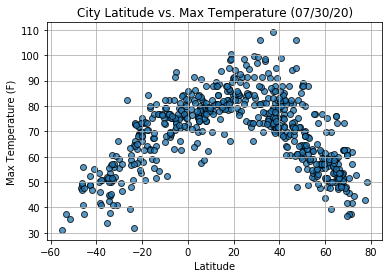

In [26]:
# Latitude vs. Temperature Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolor="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (07/30/20)")
plt.savefig("../output_data/Fig1.png")
plt.show()
# Saved as png Fig1

In [ ]:
# This plot is showing the max temperature as is correlates to latitude.
# Warmer and more ideal temperatures tend to occur closer to the equator.

## Latitude vs. Humidity Plot

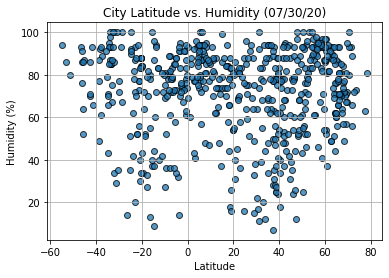

In [27]:
# Latitude vs. Humidity Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolor="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (07/30/20)")
plt.savefig("../output_data/Fig2.png")
plt.show()
# Saved as png Fig2

In [ ]:
# This plot is showing humidity rates as is correlates to latitude.
# A majority of the humidity rates tend to be greater than 60% across all latitude points.

## Latitude vs. Cloudiness Plot

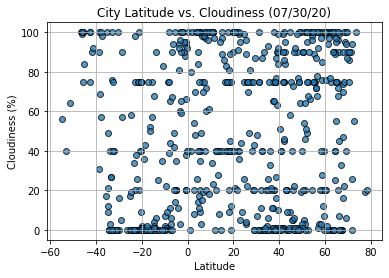

In [28]:
# Latitude vs. Cloudiness Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolor="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (07/30/20)")
plt.savefig("../output_data/Fig3.png")
plt.show()
# Saved as png Fig3

In [ ]:
# This plot is showing cloudiness rates as is correlates to latitude.
# There is no correlation to cloudiness as this polt shows clouds occur everywhere.

## Latitude vs. Wind Speed Plot

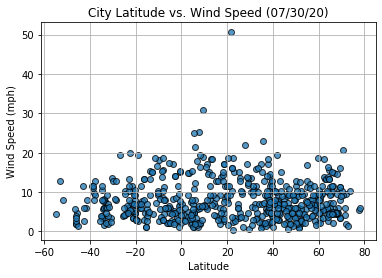

In [29]:
# Latitude vs. Wind Speed Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolor="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/30/20)")
plt.savefig("../output_data/Fig4.png")
plt.show()
# Saved as png Fig4

In [ ]:
# This plot is showing wind speed as is correlates to latitude.
# Wind speed appears to be fairly equal across all latitude points.
# One outlier exists at over 50 mph near latitude 20.

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames

northern = clean_city_data.loc[clean_city_data["Lat"] > 0]
northern

southern = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Esperance,-33.87,121.90,44.60,100,40,5.82,AU,1596145834
4,Port Alfred,-33.59,26.89,56.71,85,27,7.63,ZA,1596145765
5,Port Elizabeth,-33.92,25.57,53.60,93,3,5.82,ZA,1596145823
6,Rikitea,-23.12,-134.97,72.79,87,98,13.24,PF,1596146066
10,Gizo Government Station,-8.10,156.84,82.24,81,100,15.55,SB,1596146129
...,...,...,...,...,...,...,...,...,...
577,Ndjolé,-0.18,10.76,75.38,80,92,4.07,GA,1596146441
578,Barra,-11.09,-43.14,76.32,42,0,7.27,BR,1596146441
586,Antsohihy,-14.88,47.99,69.28,96,1,2.59,MG,1596146443
591,Rockhampton,-23.38,150.50,57.20,82,0,4.70,AU,1596146444


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4626637271258492


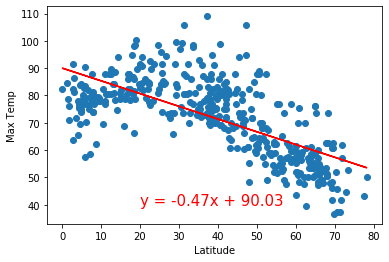

In [38]:
# Add the linear regression equation and line to plot
x_values = northern['Lat']
y_values = northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows a moderate correlation between the northern hemisphere and max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6608881914965161


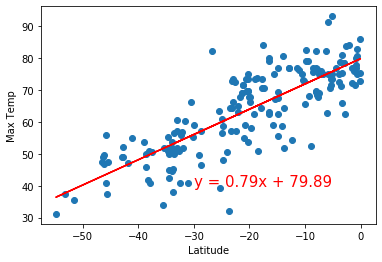

In [40]:
# Add the linear regression equation and line to plot
x_values = southern['Lat']
y_values = southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows a higher correlation between the southern hemisphere and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 3.2218573321157465e-05


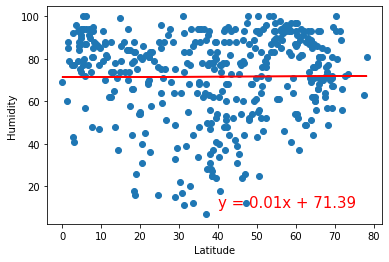

In [42]:
# Add the linear regression equation and line to plot
x_values = northern['Lat']
y_values = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows no correlation between the northern hemisphere and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01816472583064


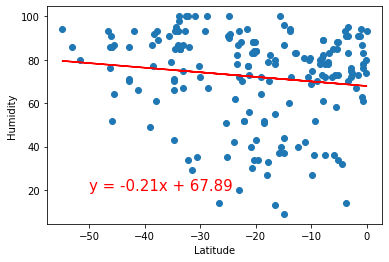

In [43]:
# Add the linear regression equation and line to plot
x_values = southern['Lat']
y_values = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows very low correlation between the southern hemisphere and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00024096524398046885


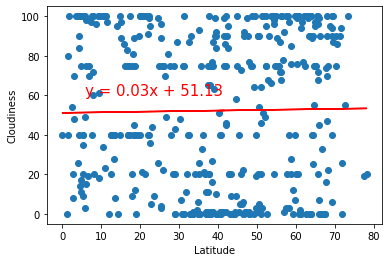

In [44]:
# Add the linear regression equation and line to plot
x_values = northern['Lat']
y_values = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows no correlation between the northern hemisphere and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00556088506161477


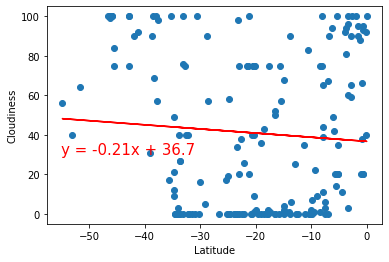

In [50]:
# Add the linear regression equation and line to plot
x_values = southern['Lat']
y_values = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows very low correlation between the southern hemisphere and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009217296122449772


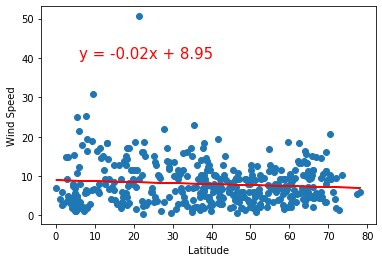

In [47]:
# Add the linear regression equation and line to plot
x_values = northern['Lat']
y_values = northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows no correlation between the northern hemisphere and wind speed.
# Special note: outlier at latitude 20 degrees and wind speed 50 mph

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01010070174904476


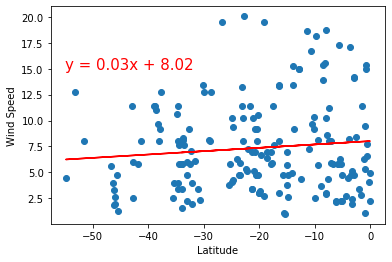

In [51]:
# Add the linear regression equation and line to plot
x_values = southern['Lat']
y_values = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This plot shows very low correlation between the southern hemisphere and wind speed.